In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### IMPORTACION DE DATASET

In [2]:
import gzip
import pandas as pd

def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

In [1]:
#contador = 0
#data_reviews = []
# Vamos a guardar una de cada 10 reviews para no llenar la memoria RAM. Si pones n = 3, 
# abrira uno de cada tres, y asi.
#n = 3
#for l in parse('C:\\Users\\Usuario\\source\\repos\\steam_reviews.json.gz'):
    #if contador%n == 0:
        #data_reviews.append(l)
#    else:
#          pass
#   contador += 1
    
 


In [5]:
data_reviews=pd.read_csv('C:\\Users\\Usuario\\source\\data_reviews.csv')

data_games = []
for l in parse('C:\\Users\\Usuario\\source\\repos\\steam_games.json.gz'):
        data_games.append(l)

In [7]:
data_games = pd.DataFrame(data_games)

In [27]:
data_reviews.head()

,Unnamed: 0,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,found_funny,compensation
0,0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,1,MrNinjaSquirrel,1.2,1720.0,288690,2,2014-12-17,"""It's like Sudoku, but as a ball!""\nI have to ...",False,1,NaN,NaN,NaN
2,2,HeadShot,0.6,1035.0,384210,2,2017-01-30,"I say, colour discrimination. Why is it the re...",False,1,NaN,NaN,NaN
3,3,Rapxtor,59.7,1597.0,399660,1,2017-06-21,"Ive always been a fan of the C&C franchise, an...",False,1,NaN,NaN,NaN
4,4,Nyc2x,4.3,471.0,35600,0,2014-12-24,A hybrid adventure/puzzle game that will reall...,False,3,NaN,NaN,NaN


### DESCRIPCIÓN DE FEATURES DATA_REVIEWS

**username:** Nombre del usuario que ha dejado la reseña

**hours:** Cantidad de horas jugadas (acumuladas) en el juego al cual se le ha hecho la reseña

**products:** Cantidad de otros juegos probados

**product_id:** Identificacion númerica del juego reseñado

**page_order:** Número de página en el cual se encuentra el juego dentro de la plataforma

**date:** Fecha en la cual se ha creado la reseña

**text:** Comentario sobre el juego

**early_access:** Si es True significa que el juego puede ser adquirido durante su etapa de desarrollo

**page:** No es interpretable

**user_id:** Identificacion númerica del usuario creador de la reseña

**found_funny:** Cantidad de calificaciones positivas creadas por otros usuarios

**compensation:** Variable no interpretable dada la cantidad de valores nulos contenidos en ella


In [11]:
data_games.head()

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN


### DESCRIPCIÓN DE FEATURES INCLUIDOS EN DATA_GAMES

**desarrollador:** Creador del juego

**genres:** Géneros, caracteristicas del juego

**app_name:** Editor del juego

**title:** Nombre del juego

**url:** Dirección web donde encontrarlo

**release_date:** Fecha de lanzamiento

**tags:** Etiquetas relacionadas con el juego

**discount_price:** Precio con descuento incluido

**reviews_url:** Dirección web donde encontrar las reseñas sobre el juego

**specs:** Especificaciones

**price:** Precio sin descuento

**early_access:** Si es True significa que el juego puede ser adquirido durante su etapa de desarrollo

**id:** Identificacion númerica del juego publicado

**sentiment:** Emoción promedio generada en los usuarios

**metascore:** Puntaje promedio recibido por los usuarios


### ANALISIS EXPLORATORIO DATA_REVIEWS

In [68]:
data_reviews.head()

,Unnamed: 0,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,found_funny,compensation
0,0,Chaos Syren,0.1,41.0,725280,0,2017-12-17,This would not be acceptable as an entertainme...,False,1,NaN,NaN,NaN
1,1,MrNinjaSquirrel,1.2,1720.0,288690,2,2014-12-17,"""It's like Sudoku, but as a ball!""\nI have to ...",False,1,NaN,NaN,NaN
2,2,HeadShot,0.6,1035.0,384210,2,2017-01-30,"I say, colour discrimination. Why is it the re...",False,1,NaN,NaN,NaN
3,3,Rapxtor,59.7,1597.0,399660,1,2017-06-21,"Ive always been a fan of the C&C franchise, an...",False,1,NaN,NaN,NaN
4,4,Nyc2x,4.3,471.0,35600,0,2014-12-24,A hybrid adventure/puzzle game that will reall...,False,3,NaN,NaN,NaN


In [69]:
data_reviews.drop('Unnamed: 0',axis=1,inplace=True)

Cantidad de filas y columnas

In [80]:
data_reviews.shape

(77930, 12)

Información del tipo de dato contenido en cada feature

In [81]:
data_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77930 entries, 0 to 77930
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   username      77930 non-null  object 
 1   hours         77652 non-null  float64
 2   products      77760 non-null  float64
 3   product_id    77930 non-null  int64  
 4   page_order    77930 non-null  int64  
 5   date          77930 non-null  object 
 6   text          77762 non-null  object 
 7   early_access  77930 non-null  bool   
 8   page          77930 non-null  int64  
 9   user_id       31617 non-null  float64
 10  found_funny   12052 non-null  float64
 11  compensation  1403 non-null   object 
dtypes: bool(1), float64(4), int64(3), object(4)
memory usage: 9.2+ MB


Estadisticos de las variables númericas que contribuyen a definir la calificación del usuario

In [79]:
data_reviews.loc[:,['hours','products','found_funny']].describe()

,hours,products,found_funny
count,77652.000000,77760.000000,12052.000000
mean,113.383494,236.005517,8.445569
std,395.488871,472.206397,83.998122
min,0.000000,1.000000,1.000000
25%,4.000000,46.000000,1.000000
50%,15.400000,111.000000,1.000000
75%,59.500000,247.000000,3.000000
max,18543.300000,11222.000000,4051.000000


De los estadisticos obtenidos podemos decir que la base de datos contiene valores outlier o que carecen de sentido, mas abajo grafico la ditribución de los features "hours" y "products" con el fin de visualizar la afirmación aquí contenida.

Valores nulos contenidos en cada feature

In [31]:
data_reviews.isna().sum()

Unnamed: 0          0
username            1
hours             278
products          170
product_id          0
page_order          0
date                0
text              168
early_access        0
page                0
user_id         46313
found_funny     65878
compensation    76528
dtype: int64

Visualización de la distribución de la variable "hours"

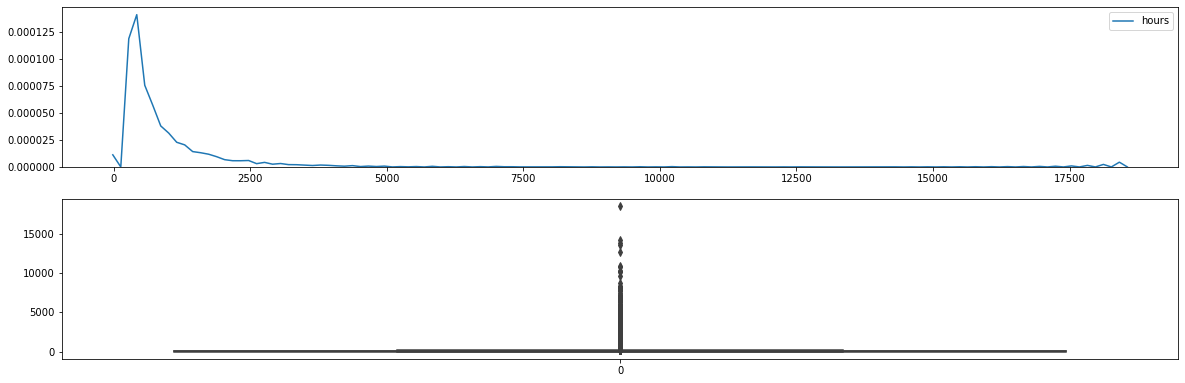

In [82]:
plt.figure(figsize=(20, 10))

plt.subplot(3,1,1)
sns.kdeplot(data=data_reviews.hours)

plt.subplot(3,1,2)
sns.boxplot(data=data_reviews.hours)


Visualización de la distribución de la variable "products"

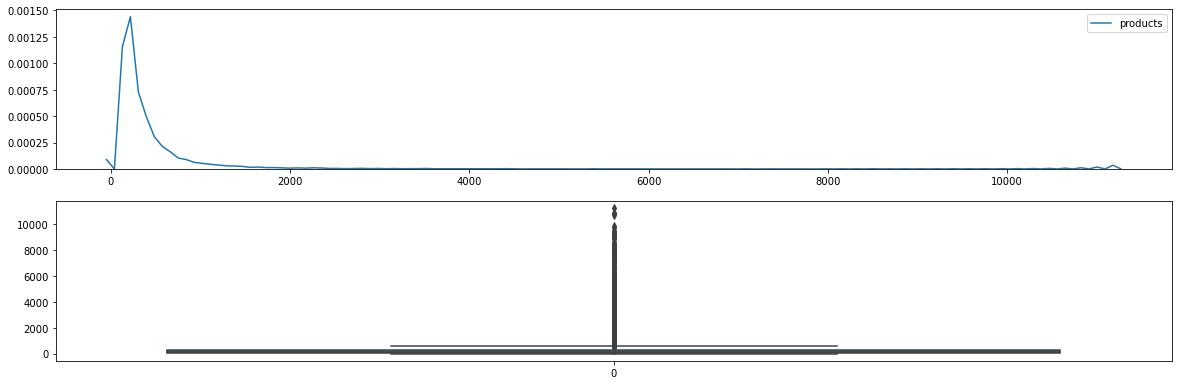

In [73]:
plt.figure(figsize=(20, 10))

plt.subplot(3,1,1)
sns.kdeplot(data=data_reviews.products)

plt.subplot(3,1,2)
sns.boxplot(data=data_reviews.products)

In [64]:
data_reviews[data_reviews.username.isna()]

,Unnamed: 0,username,hours,products,product_id,page_order,date,text,early_access,page,user_id,found_funny,compensation
13218,13218,NaN,15.1,141.0,240760,3,2016-10-09,Wasteland 2 aka save-load simulator:\n65% of m...,False,38,7.656120e+16,4.0,NaN


Elimino la fila que contiene el username vacío 

In [67]:
data_reviews.drop([13218],axis=0,inplace=True)
data_reviews.reindex()